---
# Módulo 4 - Estatística para MF
---

In [3]:
import numpy as np
import pandas as pd

import pylab
import statsmodels.api as sm
from sklearn import linear_model
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import yfinance as yf
import vectorbt as vbt

import seaborn as sns
import plotly.graph_objects as go
import plotly_express as px
import sweetviz as sv
from plotly.subplots import make_subplots

## 1. Distribuição dos dados

Distribuição dos dados é o ponto chave para praticamente tudo o que entendemos por estatística

Apesar disso, muitas vezes é simplesmente ignorada nos modelos. Muitas vezes, modelos podem \
não funcionar por causa de algumas poucas observações que distorcem a distribuição dos dados.

### 1.1. Distribuição Normal

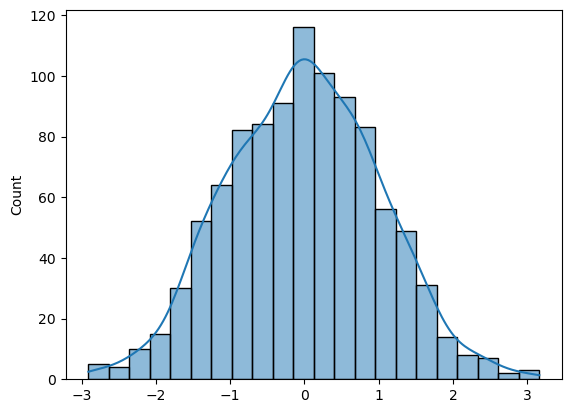

In [4]:
normal_dist = np.random.normal(0, 1, 1000)
normal_fig1 = sns.histplot(normal_dist, kde=True)

In [5]:
print(np.mean(normal_dist))
print(np.median(normal_dist))
print(stats.mode(normal_dist))

-0.009884855091645299
-0.007114837153784767
ModeResult(mode=-2.9077673859705935, count=1)


In [6]:
fig01 = px.histogram(normal_dist, color_discrete_sequence=["lightseagreen"])
fig01.add_vline(x=np.mean(normal_dist), line_width=3, line_color="red")
fig01.add_vline(
    x=np.median(normal_dist), line_width=3, line_dash="dash", line_color="red"
)
fig01.update_layout(
    width=600,
    height=600,
    template="simple_white",
    paper_bgcolor="#f7f8fa",
    margin=dict(l=20, r=20, t=20, b=20),
    showlegend=False,
)

#### Testes de Normalidade

- À medida que aumenta o uso de grandes volumes de dados, os testes de normalidade vão caindo em desuso, pois eles são sensíveis justamente à quantidade de dados.


In [7]:
stats.normaltest(normal_dist)

## pvalue > 0.05 --> normal

NormaltestResult(statistic=1.2352427414194684, pvalue=0.5392255310096106)

#### Medidas de posição: quantis

Quantis são pontos de corte que dividem um intervalo de distribuição de probabilidade em intervalos contínuos com probabilidades iguais, ou as observações de uma amostra do mesmo jeito.

<img src="https://cdn.scribbr.com/wp-content/uploads/2022/05/Quartiles-probability-distribution.webp" width="800" align="left"/>

#### Quantile - Quantile PLot (Q-Q Plot)

Compara os quanits do modelo real (imperfeito) com um modelo teórico (perfeitamente normal)

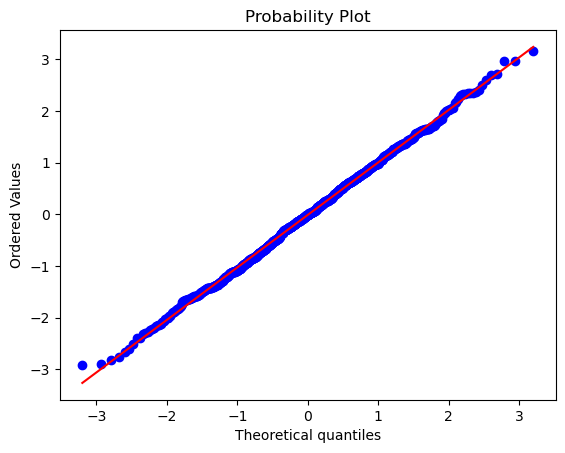

In [8]:
stats.probplot(normal_dist, dist="norm", plot=pylab)
pylab.show()

In [9]:
fig02 = go.Figure()
fig02.add_trace(
    go.Box(
        y=normal_dist,
        boxpoints="all",
        boxmean="sd",
        name="<b>Normal distribution",
        marker_color="blue",
    )
)
fig02.update_layout(
    width=450,
    height=600,
    template="simple_white",
    paper_bgcolor="#f7f8fa",
    margin=dict(l=20, r=20, t=20, b=20),
    showlegend=False,
)

print(np.quantile(normal_dist, 0.25))
print(np.percentile(normal_dist, 25))
fig02.show()

-0.7364364183568406
-0.7364364183568406


In [10]:
pd.DataFrame(normal_dist).describe()

,0
count,1000.000000
mean,-0.009885
std,1.014925
min,-2.907767
25%,-0.736436
50%,-0.007115
75%,0.691606
max,3.162873


#### Skewness


<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="800" align="left"/>

In [11]:
stats.skew(normal_dist)

0.02858765188021713

#### Medidas de dispersão

> Amplitude, desvio-padrão e médio, coef de variação e int de confiança 

In [12]:
# Desvio Padrão
# Sharpe ratio, bandas de bollinger

np.std(normal_dist, ddof=True)

1.0149248692685124

In [13]:
# Coef de Variação
# Comparar e avaliar a consistência (ex, pagamento de dividendos)

np.std(normal_dist, ddof=True) / np.mean(normal_dist) * 100

-10267.473421298095

In [14]:
# Erro padrão da Média

stats.stats.sem(normal_dist)

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_17008\1136641021.py:3: DeprecationWarning:

Please import `sem` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.



0.0320947424083713

In [15]:
# Intervalo de Confiança

ic_95 = stats.t.interval(
    confidence=0.95,
    df=len(normal_dist) - 1,
    loc=np.mean(normal_dist),
    scale=stats.sem(normal_dist),
)
ic_95

(-0.0728656988039903, 0.0530959886206997)

#### Curtose

<img src="https://www.researchgate.net/profile/Attila-Bonyar/publication/298415862/figure/fig1/AS:340236723867648@1458130164255/Illustration-of-the-skewness-and-kurtosis-values-and-how-they-correlate-with-the-shape-of_W640.jpg" width="600" align="left"/>

In [16]:
stats.kurtosis(normal_dist, fisher=True)

-0.16370272914037498

## 2. Estudo de caso

### MGLU3

In [17]:
mglu3 = yf.download("MGLU3.SA", period="max")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [18]:
go.Histogram(x=mglu3)

Histogram({
    'x': array([ 4.42836714,  4.38798809,  4.43644524, ..., 11.07999992,
          11.06999969, 10.98999977])
})

In [19]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=mglu3), row=1, col=2)
fig.add_vline(x=np.mean(mglu3), line_width=3, line_color="red", row=1, col=2)
fig.add_vline(
    x=np.median(mglu3), line_width=3, line_dash="dash", line_color="red", row=1, col=2
)

fig.add_trace(go.Box(y=mglu3, boxpoints="all", boxmean="sd"), row=1, col=1)

fig.update_layout(
    width=800, height=600, template="simple_white", margin=dict(l=20, r=20, t=20, b=20)
)

### IBOV

In [20]:
ibov = yf.download("^BVSP", start="2000-01-01")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [40]:
fig = px.histogram(ibov, color_discrete_sequence=["lightseagreen"], nbins=100)
fig.add_vline(x=np.mean(ibov), line_width=3, line_color="black")
fig.add_vline(x=np.median(ibov), line_width=3, line_dash="dash", line_color="red")

fig.update_layout(
    width=1000,
    height=600,
    template="simple_white",
    margin=dict(l=5, r=5, t=5, b=5),
    showlegend=False,
)
print("Fechamento")
fig.show()
print("Distribuição Trimodal, não reprensenta uma curva normal")

Fechamento


Distribuição Trimodal, não reprensenta uma curva normal


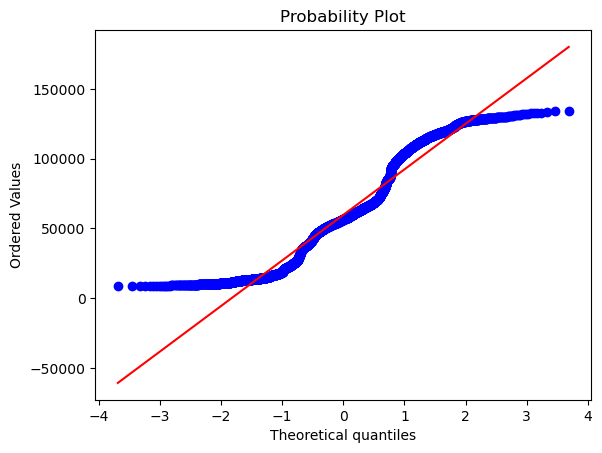

In [22]:
stats.probplot(ibov, dist="norm", plot=pylab)
pylab.show()

In [36]:
retorno = ibov.pct_change() * 100

In [46]:
fig = px.histogram(retorno, color_discrete_sequence=["lightseagreen"])



fig.add_vline(x=np.mean(retorno), line_width=3, line_color="black")
fig.add_vline(x=retorno.median(), line_width=3, line_dash="dash", line_color="red")

fig.update_layout(
    width=1000,
    height=600,
    template="simple_white",
    margin=dict(l=5, r=5, t=20, b=5),
    showlegend=False,
)
print("Retorno")
fig.show()

Retorno


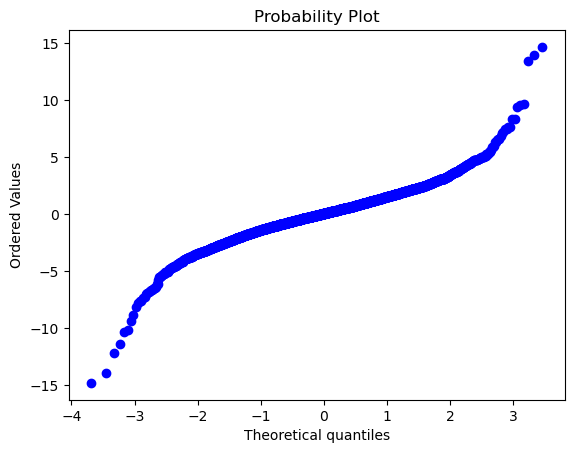

In [45]:
stats.probplot(retorno, dist="norm", plot=pylab)
pylab.show()

### DY Petro

In [60]:
div_petro = vbt.YFData.download("PETR4.SA").get(["Close", "Dividends"])

In [63]:
div_petro["soma_div"] = div_petro.Dividends.rolling("365D").sum()

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_17008\32600064.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
div_petro["DY"] = div_petro["soma_div"] / div_petro["Close"] * 100

In [72]:
dy_petro = div_petro[div_petro.Dividends != 0]

<Axes: xlabel='DY', ylabel='Count'>

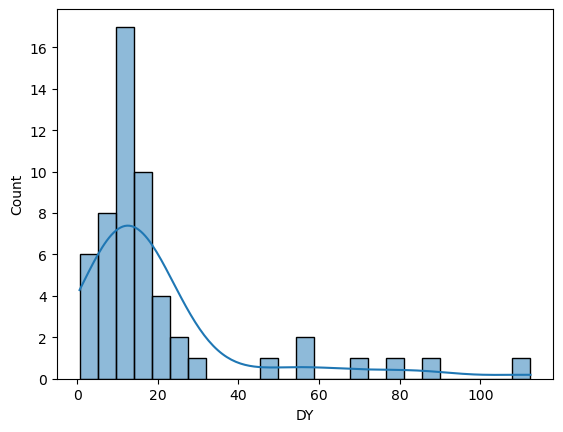

In [83]:
sns.histplot(dy_petro.DY, kde=True)

In [112]:
fig = px.scatter(x=dy_petro.Close, y=dy_petro.DY)
fig.update_layout(
    width=600,
    height=600,
    template="simple_white",
    margin=dict(l=5, r=20, t=20, b=5),
    xaxis_title="<b>Price",
    yaxis_title="<b>Dividend Yield",
)

Correlação (Peason)

In [111]:
corr, p = stats.pearsonr(dy_petro.Close, dy_petro.DY)
print("r = %.3f" % corr, " p = %.3f" % p)

r = 0.378  p = 0.004


Correlação (Spearman) \
- Não-paramétrica e não assume distribuição normal

In [110]:
corr, p = stats.spearmanr(dy_petro.Close, dy_petro.DY)
print("r = %.3f" % corr, " p = %.3f" % p)

r = 0.318   p = 0.018


### Arbitragem em ações

In [130]:
petros = yf.download(["PETR4.SA", "PETR3.SA"], start="2010-01-04")["Adj Close"]

[*********************100%%**********************]  2 of 2 completed


In [143]:
petros["Spread"] = (petros["PETR4.SA"] / petros["PETR3.SA"]).round(3)

In [154]:
# Métricas
std = np.std(petros.Spread)
mean_spread = round(np.mean(petros.Spread), 3)
sd1_min_spread = mean_spread - round(std, 3)
sd1_max_spread = mean_spread + round(std, 3)
sd2_min_spread = mean_spread - (2 * round(std, 3))
sd2_max_spread = mean_spread + (2 * round(std, 3))

In [167]:
fig = px.line(petros, x=petros.index, y=petros.Spread)

fig.add_hline(y=mean_spread, line_width=3, line_color="red")
fig.add_hline(y=sd1_min_spread, line_width=3, line_color="green", line_dash="dot")
fig.add_hline(y=sd1_max_spread, line_width=3, line_color="green", line_dash="dot")
fig.add_hline(y=sd2_min_spread, line_width=3, line_color="orange", line_dash="dash")
fig.add_hline(y=sd2_max_spread, line_width=3, line_color="orange", line_dash="dash")

fig.update_layout(
    width=1500,
    height=600,
    xaxis_rangeslider_visible=False,
    title_text="Razão entre preço PETR4 e PETR3 (2010 a jul/2024)",
    margin=dict(l=20, r=20, t=70, b=20),
)
fig

## 3. Médias Móveis

In [185]:
# Suavização de Curvas

petros["MM50"] = petros["PETR4.SA"].rolling(50).mean()

In [202]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=petros.index, y=petros["PETR4.SA"], name="PETR4.SA"))
fig.add_trace(go.Scatter(x=petros.index, y=petros["MM50"], name="MM 50"))
fig.add_trace(go.Scatter(x=petros.index, y=petros["MM20"], name="MM 20"))

fig.update_layout(
    width=1200,
    height=600,
    xaxis_rangeslider_visible=False,
    title_text="Suavização da Curva de preções PETR4",
    margin=dict(l=10, r=20, b=20, t=60),
)

### Z Score

In [204]:
petros['ic95_mm20_lower'] = petros['PETR4.SA'].rolling(20).mean() - 1.96 * petros['PETR4.SA'].rolling(20).std()
petros['ic95_mm20_upper'] = petros['PETR4.SA'].rolling(20).mean() + 1.96 * petros['PETR4.SA'].rolling(20).std()

In [205]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=petros.index, y=petros["PETR4.SA"], name="PETR4.SA"))
fig.add_trace(go.Scatter(x=petros.index, y=petros["MM20"], name="MM 20"))
fig.add_trace(go.Scatter(x=petros.index, y=petros["ic95_mm20_lower"], name="IC 95 lower MM 20"))
fig.add_trace(go.Scatter(x=petros.index, y=petros["ic95_mm20_upper"], name="IC 95 upper MM 20"))

fig.update_layout(
    width=1200,
    height=600,
    xaxis_rangeslider_visible=False,
    title_text="Suavização da Curva de preções PETR4",
    margin=dict(l=10, r=20, b=20, t=60),
)